# Kasus COVID-19 Di Jawa Tengah

In [16]:
import requests
import numpy as np
import pandas as pd

resp_jateng = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json')
cov_jateng_raw = resp_jateng.json()

In [17]:
# Mengetahui nama-nama elemen utama yang tersedia

print('Nama-nama elemen utama :\n' , cov_jateng_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Tengah :%d' %cov_jateng_raw['kasus_total'])
print('Presentase kematian akibat COVID-19 di Jawa Tengah :%f.2%% ' % cov_jateng_raw['meninggal_persen'] )
print('Presentase tingkat kesembuhan dari COVID-19 di Jawa Tengah : %f.2%%' %cov_jateng_raw['sembuh_persen'])

Nama-nama elemen utama :
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Tengah :423915
Presentase kematian akibat COVID-19 di Jawa Tengah :5.546631.2% 
Presentase tingkat kesembuhan dari COVID-19 di Jawa Tengah : 84.920562.2%
Nama-nama elemen utama :
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Tengah :423915
Presentase kematian akibat COVID-19 di Jawa Tengah :5.546631.2% 
Presentase tingkat kesembuhan dari COVID-19 di Jawa Tengah : 84.920562.2%


In [18]:
# Memperoleh Informasi Lebih Lengkap

cov_jateng = pd.DataFrame(cov_jateng_raw['list_perkembangan'])
print('Info cov_jateng: \n', cov_jateng.info())
print('\nLima data teratas cov_jateng:\n', cov_jateng.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       521 non-null    int64
 1   KASUS                         521 non-null    int64
 2   MENINGGAL                     521 non-null    int64
 3   SEMBUH                        521 non-null    int64
 4   DIRAWAT_OR_ISOLASI            521 non-null    int64
 5   AKUMULASI_KASUS               521 non-null    int64
 6   AKUMULASI_SEMBUH              521 non-null    int64
 7   AKUMULASI_MENINGGAL           521 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  521 non-null    int64
dtypes: int64(9)
memory usage: 36.8 KB
Info cov_jateng: 
 None

Lima data teratas cov_jateng:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583625600000      1          1       0                   0   
1  1583712000000      0          0       0

In [19]:
# Melakukan pembersihan data

cov_jateng_tidy = (cov_jateng.drop(columns = [item for item in cov_jateng.columns
                                                                   if item.startswith('AKUMULASI')
                                                                       or item.startswith('DIRAWAT')])
                                            .rename(columns = str.lower)
                                            .rename(columns = {'kasus': 'kasus_baru'})
                 )
cov_jateng_tidy['tanggal'] = pd.to_datetime(cov_jateng_tidy['tanggal']*1e6, unit = 'ns')
print('Lima data teratas: \n', cov_jateng_tidy.head())

Lima data teratas: 
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-08           1          1       0
1 2020-03-09           0          0       0
2 2020-03-10           0          0       0
3 2020-03-11           2          1       1
4 2020-03-12           0          0       0
Lima data teratas: 
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-08           1          1       0
1 2020-03-09           0          0       0
2 2020-03-10           0          0       0
3 2020-03-11           2          1       1
4 2020-03-12           0          0       0


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

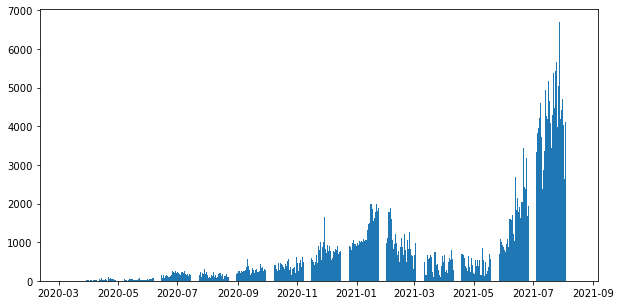

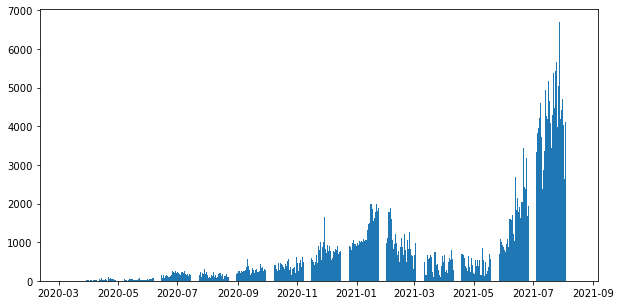

In [20]:
# Menggunakan Grafik untuk visualisasi data agar lebih mudah dimengerti

import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data = cov_jateng_tidy, x = 'tanggal' , height = 'kasus_baru')
plt.show()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

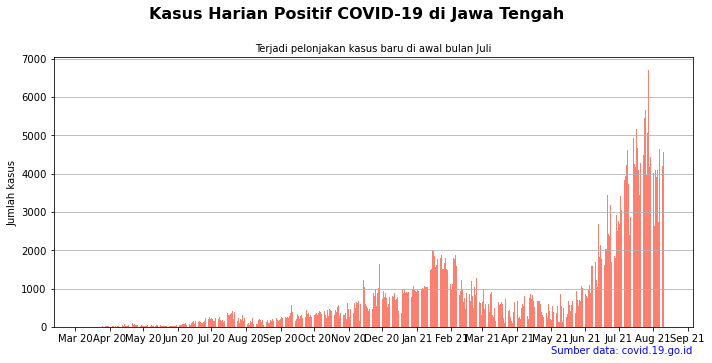

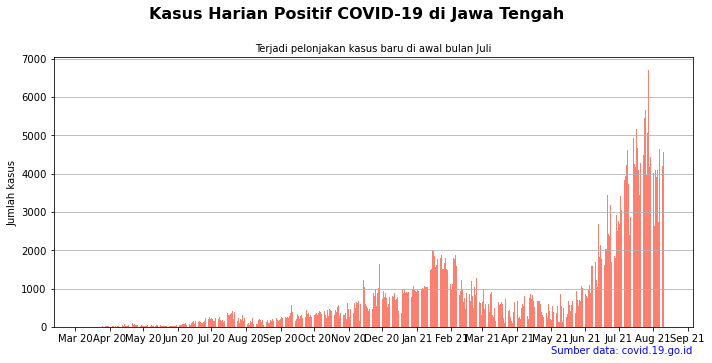

In [21]:
# Memberikan keterangan pada grafik

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(data = cov_jateng_tidy, x = 'tanggal', height = 'kasus_baru', color = 'salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Tengah',
            y = 1.00, fontsize = 16, fontweight = 'bold', ha = 'center')
ax.set_title('Terjadi pelonjakan kasus baru di awal bulan Juli',
            fontsize = 10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1,  -0.1, 'Sumber data: covid.19.go.id',
        color = 'blue', ha = 'right', transform = ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

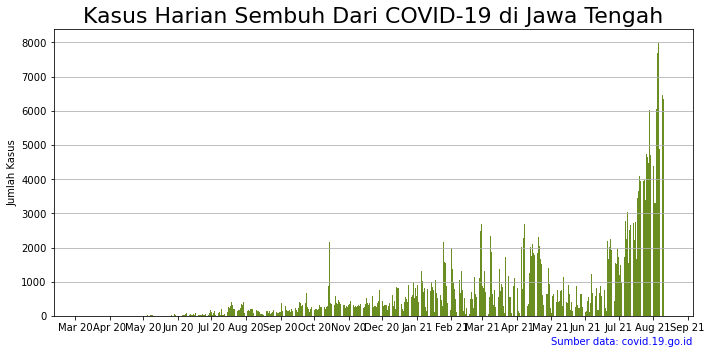

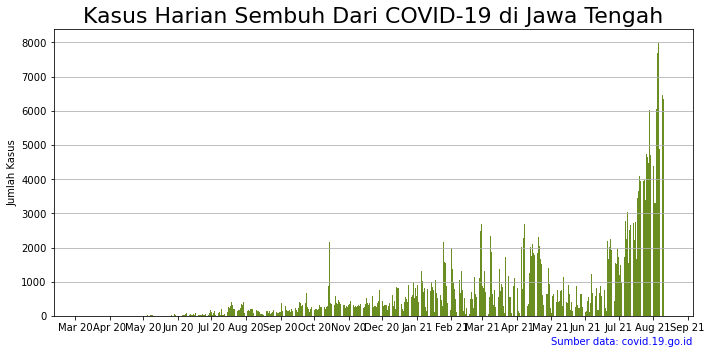

In [22]:
#Grafik untuk kasus sembuh

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(data = cov_jateng_tidy, x = 'tanggal', height = 'sembuh', color = 'olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Tengah',
            fontsize = 22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color = 'blue', ha = 'right', transform = ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator(''))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis = 'y')
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

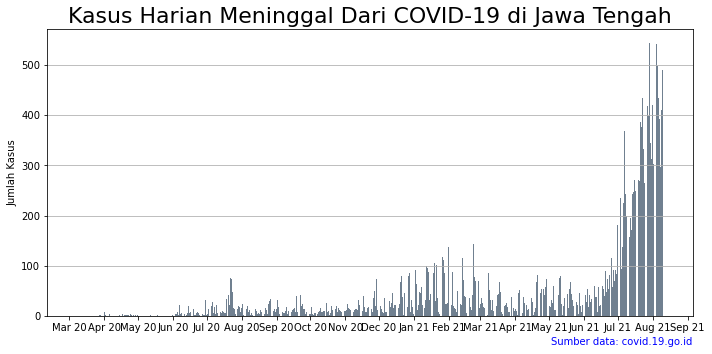

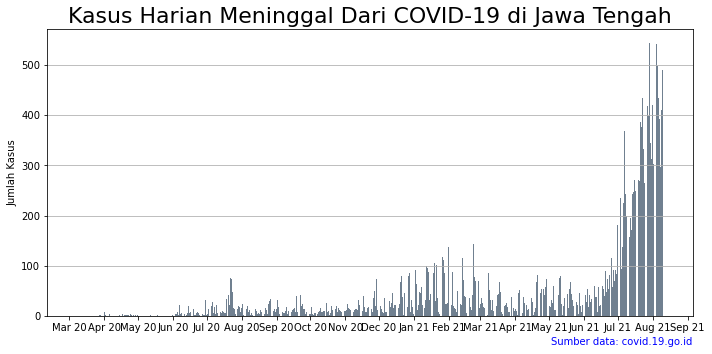

In [23]:
# Grafik Kasus Meninggal

plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(data = cov_jateng_tidy, x = 'tanggal', height = 'meninggal', color = 'slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Tengah',
            fontsize = 22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color = 'blue', ha = 'right', transform = ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator(''))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [24]:
# Grafik per pekan --mengamati grafik lebih dalam

cov_jateng_pekanan = (cov_jateng_tidy.set_index('tanggal')['kasus_baru']
                    .resample('W')
                    .sum()
                    .reset_index()
                    .rename(columns = {'kasus_baru' : 'jumlah'}))

cov_jateng_pekanan

,tanggal,jumlah
0,2020-03-08,1
1,2020-03-15,5
2,2020-03-22,13
3,2020-03-29,67
4,2020-04-05,93
...,...,...
71,2021-07-18,29417
72,2021-07-25,32777
73,2021-08-01,33069
74,2021-08-08,26819


,tanggal,jumlah
0,2020-03-08,1
1,2020-03-15,5
2,2020-03-22,13
3,2020-03-29,67
4,2020-04-05,93
...,...,...
71,2021-07-18,29417
72,2021-07-25,32777
73,2021-08-01,33069
74,2021-08-08,26819


In [25]:
# Menambahkan kolom 'tahun' dan 'pekan ke'

cov_jateng_pekanan['tahun'] = cov_jateng_pekanan['tanggal'].apply(lambda x: x.year)
cov_jateng_pekanan['pekan ke'] = cov_jateng_pekanan['tanggal'].apply(lambda x : x.weekofyear)
cov_jateng_pekanan = cov_jateng_pekanan [['tahun', 'pekan ke', 'jumlah']]


print('Info cov_jateng_pekanan: ')
print(cov_jateng_pekanan.info())
print('\nLima data teratas cov_jateng_pekanan:\n' , cov_jateng_pekanan.head())



Info cov_jateng_pekanan: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     76 non-null     int64
 1   pekan ke  76 non-null     int64
 2   jumlah    76 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB
None

Lima data teratas cov_jateng_pekanan:
    tahun  pekan ke  jumlah
0   2020        10       1
1   2020        11       5
2   2020        12      13
3   2020        13      67
4   2020        14      93
Info cov_jateng_pekanan: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     76 non-null     int64
 1   pekan ke  76 non-null     int64
 2   jumlah    76 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB
None

Lima data teratas cov_jateng_pekanan:
    tahun  pekan ke  jumlah
0   2020        10 

In [26]:
# Membuat tambahan kolom agar lebih mudah membandingkan jumlah pekan ini dan pekan sebelumnya

cov_jateng_pekanan['jumlah_pekanlalu'] = cov_jateng_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)

cov_jateng_pekanan['lebih_baik'] = cov_jateng_pekanan['jumlah'] < cov_jateng_pekanan['jumlah_pekanlalu']

print('Sepuluh teratas:\n', cov_jateng_pekanan.tail(10))



Sepuluh teratas:
     tahun  pekan ke  jumlah  jumlah_pekanlalu  lebih_baik
66   2021        23   11377              6248       False
67   2021        24   13335             11377       False
68   2021        25   16910             13335       False
69   2021        26   19152             16910       False
70   2021        27   26057             19152       False
71   2021        28   29417             26057       False
72   2021        29   32777             29417       False
73   2021        30   33069             32777       False
74   2021        31   26819             33069        True
75   2021        32    8769             26819        True
Sepuluh teratas:
     tahun  pekan ke  jumlah  jumlah_pekanlalu  lebih_baik
66   2021        23   11377              6248       False
67   2021        24   13335             11377       False
68   2021        25   16910             13335       False
69   2021        26   19152             16910       False
70   2021        27   26057         

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

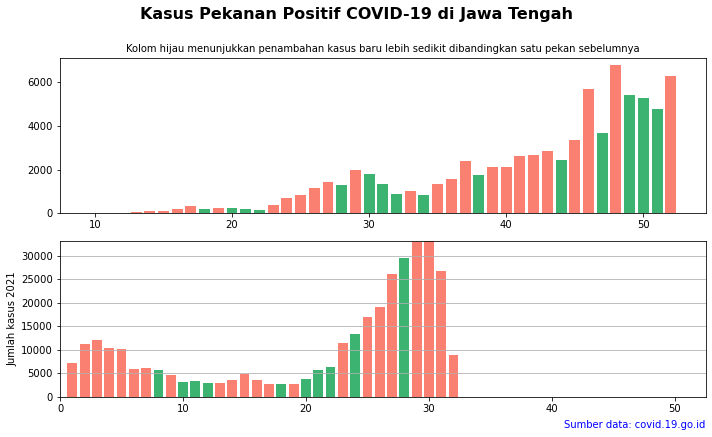

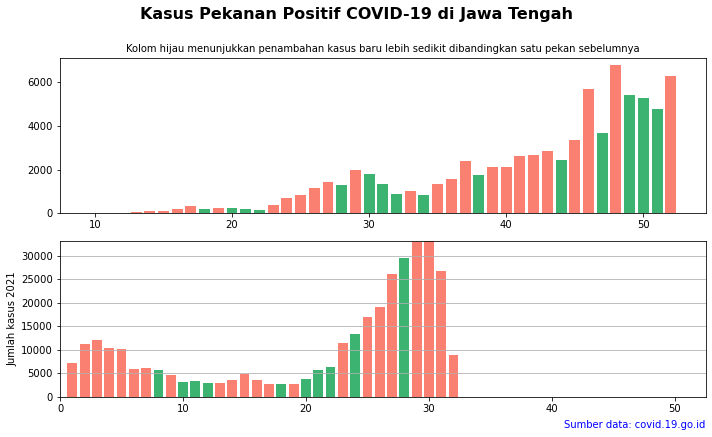

In [27]:
# Membuat Bar chart informasi data "Apakah pekan ini lebih baik dari pekan sebelumnnya"

import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jateng_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jateng_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows = jml_tahun_terjadi_covid19,
                        figsize = (10, 3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Tengah',
            y = 1.00, fontsize = 16, fontweight = 'bold', ha = 'center')
for i, ax in enumerate(axes):
    ax.bar(data = cov_jateng_pekanan.loc[cov_jateng_pekanan['tahun'] == tahun_terjadi_covid19[i]],
          x = 'pekan ke', height = 'jumlah',
          color = ['mediumseagreen' if x is True else 'salmon'
                  for x in cov_jateng_pekanan['lebih_baik']])

    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize = 10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color = 'blue', ha = 'right', transform = ax.transAxes)
        
        ax.set_xlim([0, 52.5])
        ax.set_ylim([0, max(cov_jateng_pekanan['jumlah'])])
        ax.set_xlabel('')
        ax.set_ylabel('Jumlah kasus %d' % (tahun_terjadi_covid19[i],))
        ax.grid(axis = 'y')
        

plt.tight_layout()
plt.show()

In [28]:
# Melihat kasus aktif

cov_jateng_akumulasi = cov_jateng_tidy[['tanggal']].copy()
cov_jateng_akumulasi['akumulasi_aktif'] = (cov_jateng_tidy['kasus_baru'] - cov_jateng_tidy['sembuh'] - cov_jateng_tidy['meninggal']).cumsum()
cov_jateng_akumulasi['akumulasi_sembuh'] = cov_jateng_tidy['sembuh'].cumsum()
cov_jateng_akumulasi['akumulasi_meninggal'] = cov_jateng_tidy['meninggal'].cumsum()
print(cov_jateng_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
516 2021-08-06            47107            336794                21902
517 2021-08-07            46476            341683                22294
518 2021-08-08            45432            347123                22591
519 2021-08-09            42766            353589                23000
520 2021-08-10            40484            359941                23490
       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
516 2021-08-06            47107            336794                21902
517 2021-08-07            46476            341683                22294
518 2021-08-08            45432            347123                22591
519 2021-08-09            42766            353589                23000
520 2021-08-10            40484            359941                23490


<ipython-input-29-1436ac1c2dec>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)
<ipython-input-29-1436ac1c2dec>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

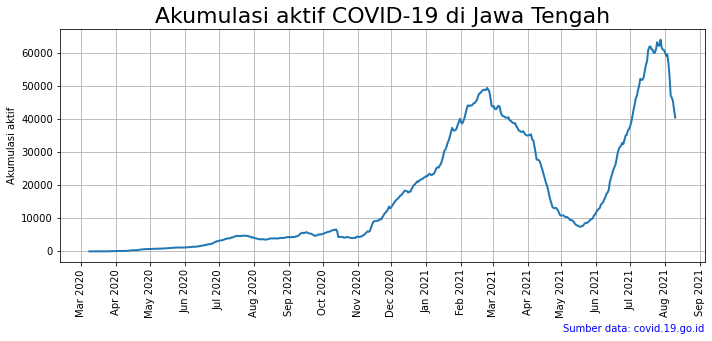

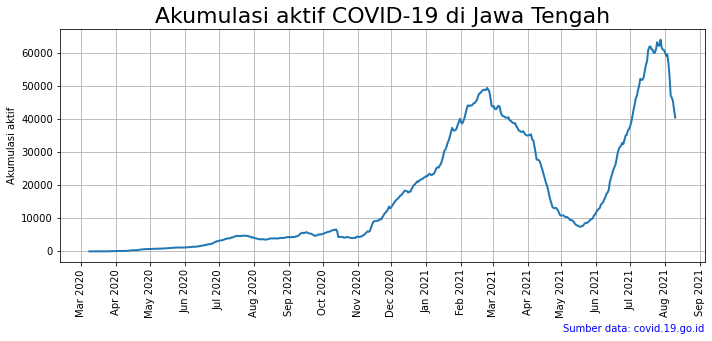

In [29]:
# Membuat Line Chart Pola Kasus Aktif

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot('tanggal', 'akumulasi_aktif', data = cov_jateng_akumulasi, lw = 2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Tengah', fontsize = 22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color = 'blue', ha = 'right', transform = ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

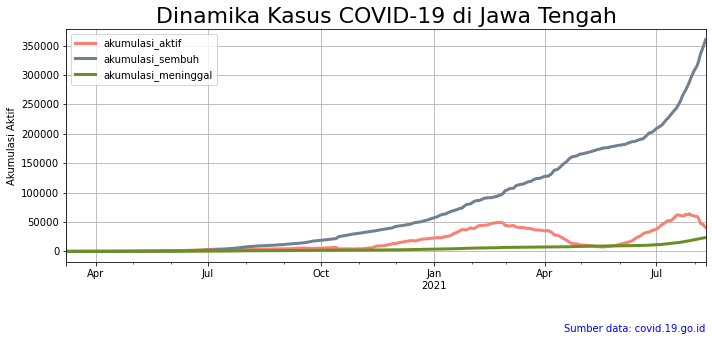

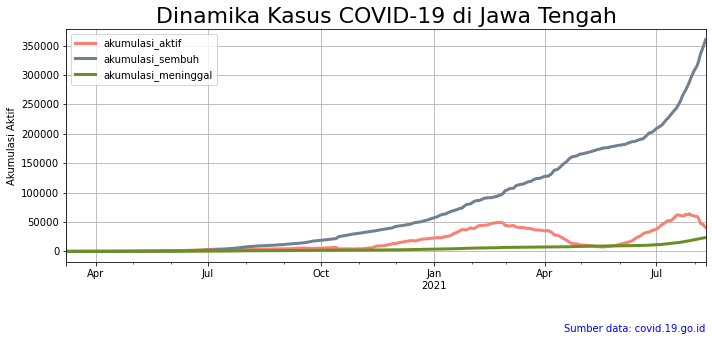

In [30]:
# Grafik Dinamika Kasus Covid-19 di Jawa Barat

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
cov_jateng_akumulasi_ts = cov_jateng_akumulasi.set_index('tanggal')
cov_jateng_akumulasi_ts.plot(kind = 'line', ax = ax, lw = 3,
                           color =['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Tengah', fontsize = 22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1 , -0.3, 'Sumber data: covid.19.go.id', color = 'blue',
       ha = 'right', transform = ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()
